In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read in data files
in_care_df = pd.read_csv("Data/in_care.txt", sep='\t')
adopted_df = pd.read_csv("Data/adopted.txt", sep='\t')
tpr_df = pd.read_csv("Data/tpr.txt", sep='\t')

In [3]:
tpr_df.head()

,Status,State,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019
0,TPR,Alabama,757.0,701.0,543.0,615.0,573.0,461.0,421.0,533.0,514.0,523.0
1,TPR,Alaska,381.0,389.0,387.0,399.0,366.0,356.0,425.0,432.0,430.0,375.0
2,TPR,Arizona,2174.0,2220.0,2299.0,2692.0,2841.0,3006.0,3379.0,3295.0,2966.0,2687.0
3,TPR,Arkansas,812.0,742.0,543.0,642.0,757.0,757.0,795.0,795.0,809.0,787.0
4,TPR,California,7230.0,6928.0,6021.0,6562.0,6379.0,6617.0,6712.0,7107.0,7098.0,7262.0


## Clean DataFrame

In [4]:
# Keep only numerical data
years_df = tpr_df.drop(["Status","State"], axis=1)

In [5]:
years_df.columns

Index(['FY 2010', 'FY 2011', 'FY 2012', 'FY 2013', 'FY 2014', 'FY 2015',
       'FY 2016', 'FY 2017', 'FY 2018', 'FY 2019'],
      dtype='object')

In [6]:
# Create list of years in dataset
years_list = []

for column in years_df.columns:
    year = column.split(" ")[1]
    years_list.append(int(year))

In [7]:
# Check shape 
years = np.array(years_list).reshape(-1,1)
years.shape

(10, 1)

In [8]:
# Store 
states = tpr_df["State"].values.tolist()

## Machine Learning

In [9]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# Train and score model, then demonstrate predictive ability for all states

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
plot_indexes = []

for index,row in years_df.iterrows():
    values = row.values.tolist()
    X = years
    y = values
    
    model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    state = states[index]
    predicted = model.predict([[2025]])
    
    print(f"{state} Score: {score}")
    print(f"Prediction for 2025 TPR: {predicted}")
    print("----------------------------")
    
    if (state in midwest) and score > .8:
        plot_indexes.append(index)

Alabama Score: 0.6129694555381774
Prediction for 2025 TPR: [315.06930693]
----------------------------
Alaska Score: 0.15150929347640352
Prediction for 2025 TPR: [420.46039604]
----------------------------
Arizona Score: 0.7461892268487935
Prediction for 2025 TPR: [3827.5990099]
----------------------------
Arkansas Score: -0.6113730779661997
Prediction for 2025 TPR: [867.62871287]
----------------------------
California Score: -0.5537584769587711
Prediction for 2025 TPR: [7352.45544554]
----------------------------
Colorado Score: -0.5715509295446393
Prediction for 2025 TPR: [372.86633663]
----------------------------
Connecticut Score: 0.5021111550063055
Prediction for 2025 TPR: [53.95544554]
----------------------------
Delaware Score: 0.43015637353096425
Prediction for 2025 TPR: [72.34653465]
----------------------------
District of Columbia Score: 0.5225395145666167
Prediction for 2025 TPR: [-30.99009901]
----------------------------
Florida Score: 0.8909756601533417
Prediction fo

In [11]:
# Create DataFrame for plotting predictions of Midwestern states with model scores greater than 80%
plots_df = years_df.iloc[plot_indexes,:]

In [12]:
plots_df_final = plots_df.copy()

In [13]:
# Use model to 

predicted_years = [2020,2022,2024,2026,2028,2030]

for year in predicted_years:
    predictions = []
    for index,row in plots_df.iterrows():
        values = row.values.tolist()
        X = years
        y = values
        
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        model.fit(X_train, y_train)
        
        prediction = model.predict([[year]])
        predictions.append(prediction[0])

    plots_df_final[f"FY {year}"] = predictions

In [14]:
plots_df_final

,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2022,FY 2024,FY 2026,FY 2028,FY 2030
23,1003.0,961.0,1008.0,1110.0,1126.0,1225.0,1457.0,1848.0,1852.0,1812.0,1952.336634,2172.970297,2393.603960,2614.237624,2834.871287,3055.504950
34,131.0,116.0,116.0,135.0,153.0,172.0,242.0,284.0,332.0,333.0,345.158416,397.574257,449.990099,502.405941,554.821782,607.237624
35,2687.0,2484.0,2277.0,2591.0,2644.0,2643.0,2730.0,2936.0,3117.0,3290.0,3182.004950,3341.955446,3501.905941,3661.856436,3821.806931,3981.757426


## Prediction

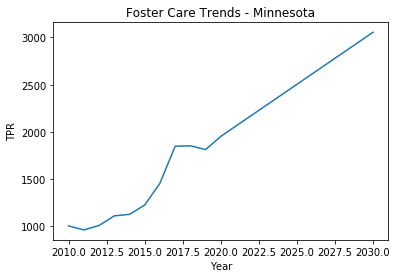

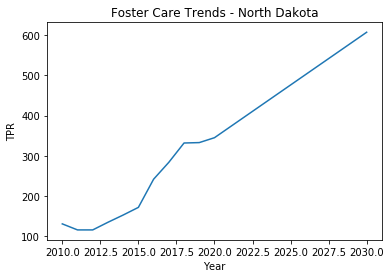

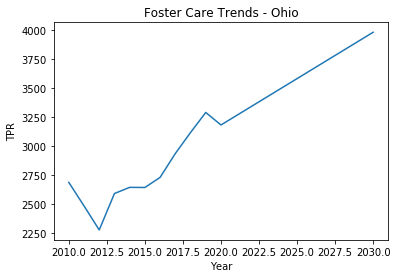

In [15]:
for index,row in plots_df_final.iterrows():
    values = row.values.tolist()
    X = years_list + predicted_years
    y = values

    plt.plot(X, y)
    plt.xlabel("Year")
    plt.ylabel(f"TPR")
    plt.title(f"Foster Care Trends - {states[index]}")
    
    plt.savefig(f"Images/{states[index]}_TPR.png")
    plt.show()